In [1]:
from pyMate.Clyde import PrepareData, SignalProcessing

In [2]:
signal_clean = r'C:\Users\carst\Google Drive\05_Projects\NET_fMRI\data\K07.Ef1\K07.Ef1_13\k07ef1_0001_cln.h5'

In [3]:
ephys_data = PrepareData(signal_filename=signal_clean)

ephys_data.frequency_band_of_interest = [30, 80]
ephys_data.channels_of_interest = [4, 7, 13]
ephys_data.prepare_ephys_data()

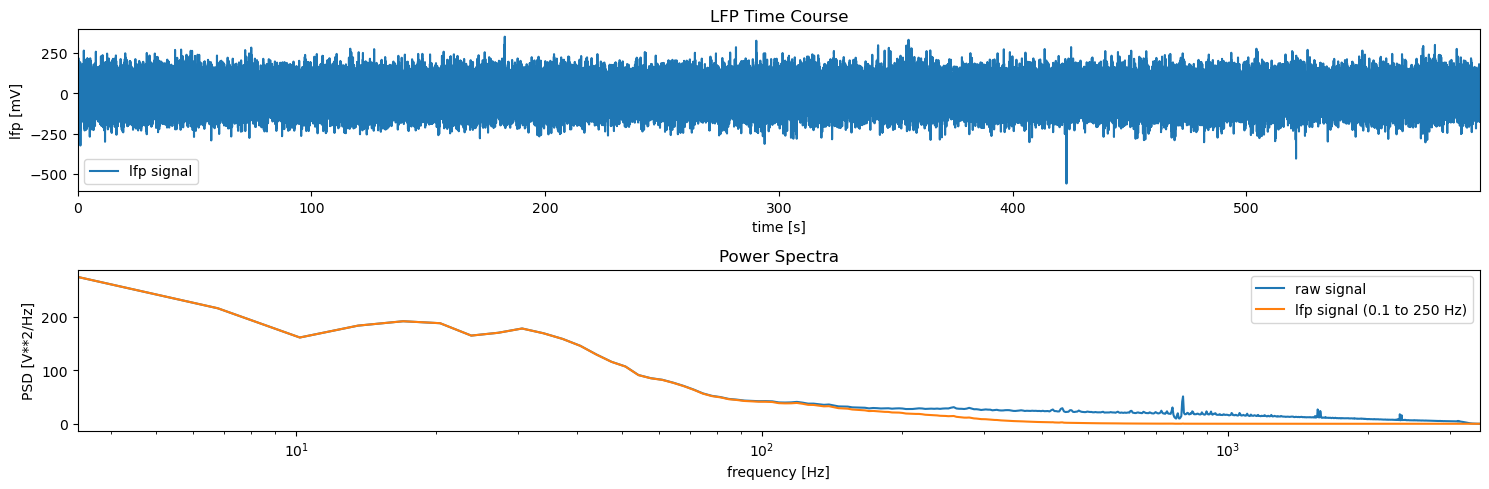

In [4]:
ephys_data.plot_it()

In [5]:
event_data = SignalProcessing(ephys_data)

In [6]:
event_data.wheres_the_party()

In [7]:
channel = 2

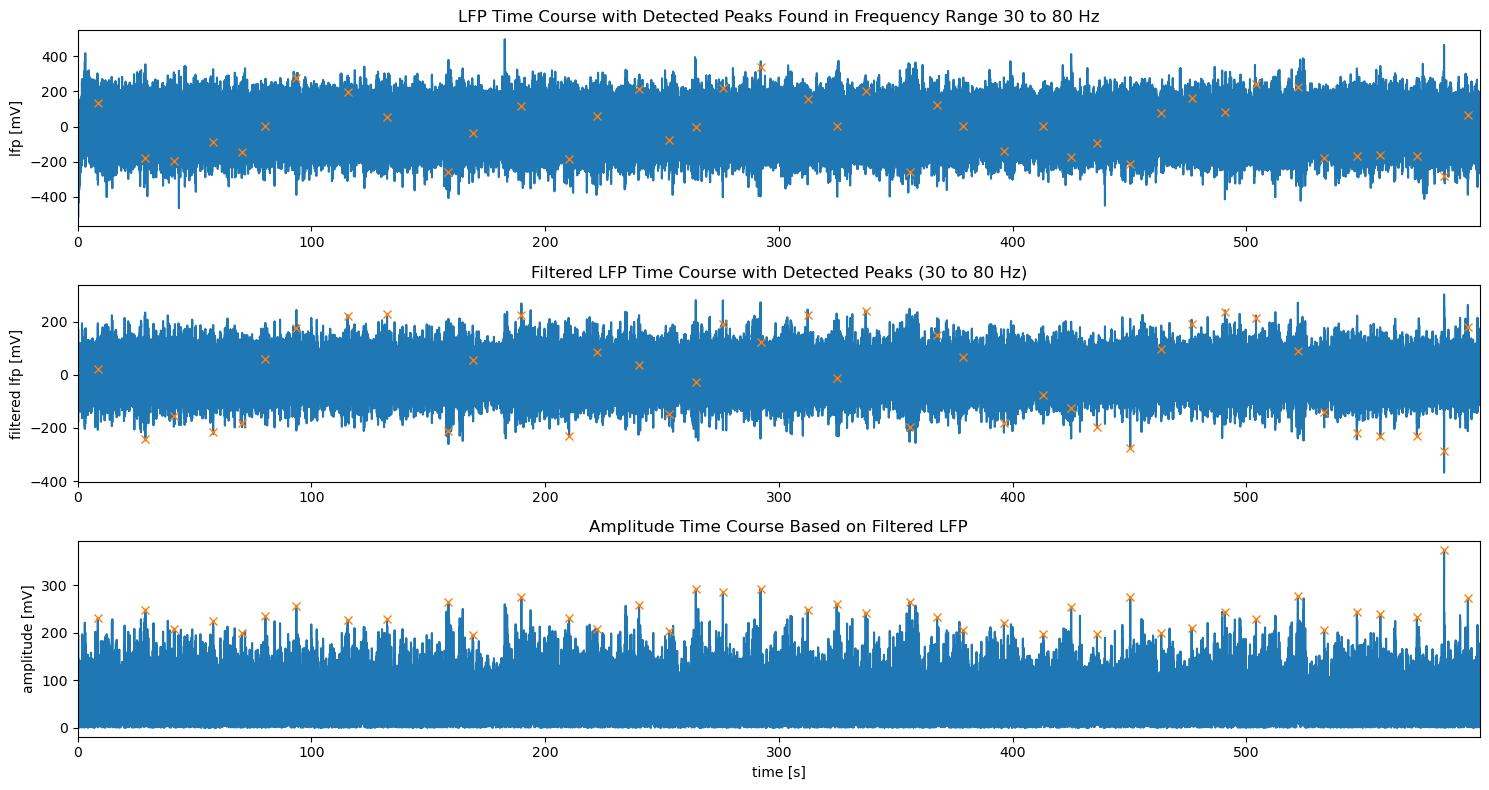

In [8]:
event_data.plot_peaks(channel)

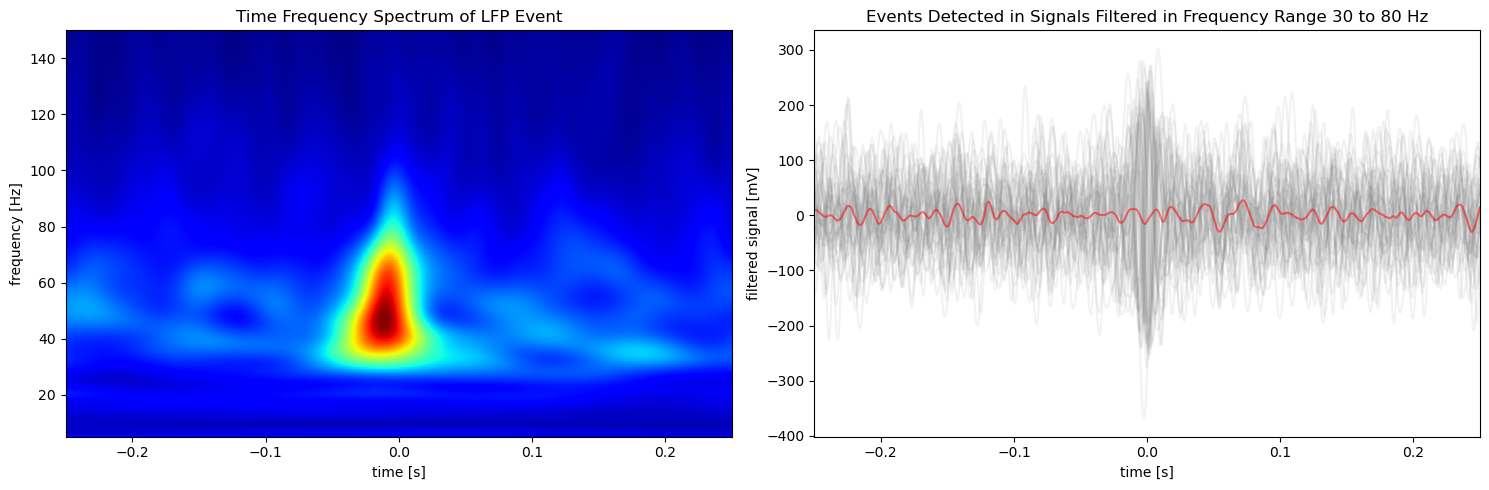

In [9]:
event_data.plot_mean_event_tfr(channel)

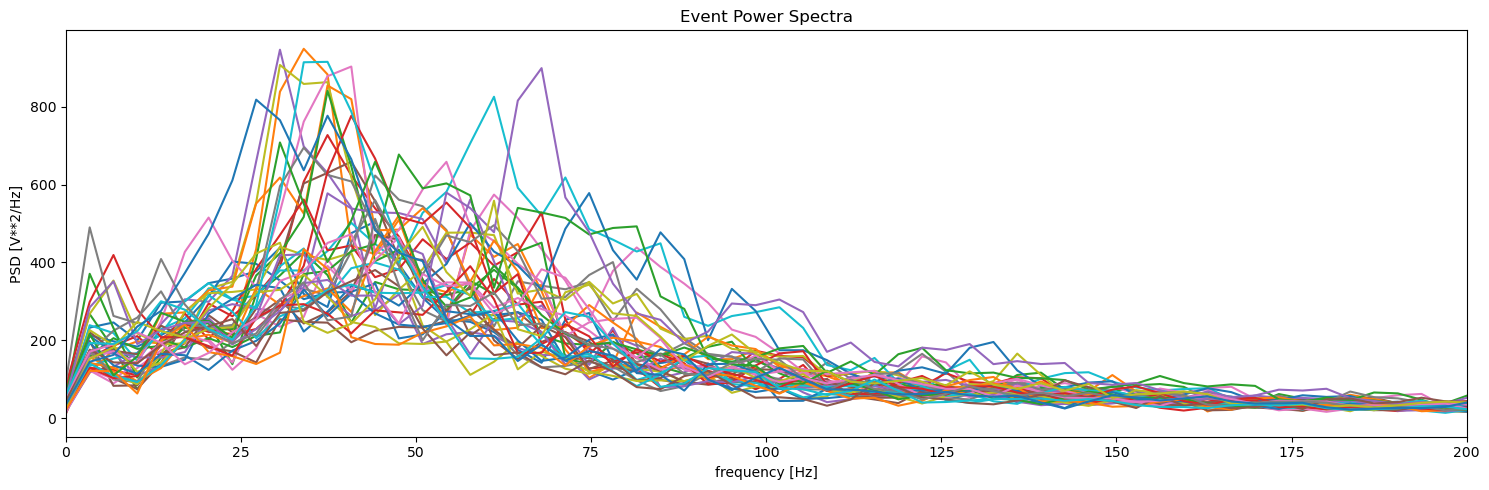

In [10]:
event_data.plot_event_spectra(channel, xlim=[0, 200])

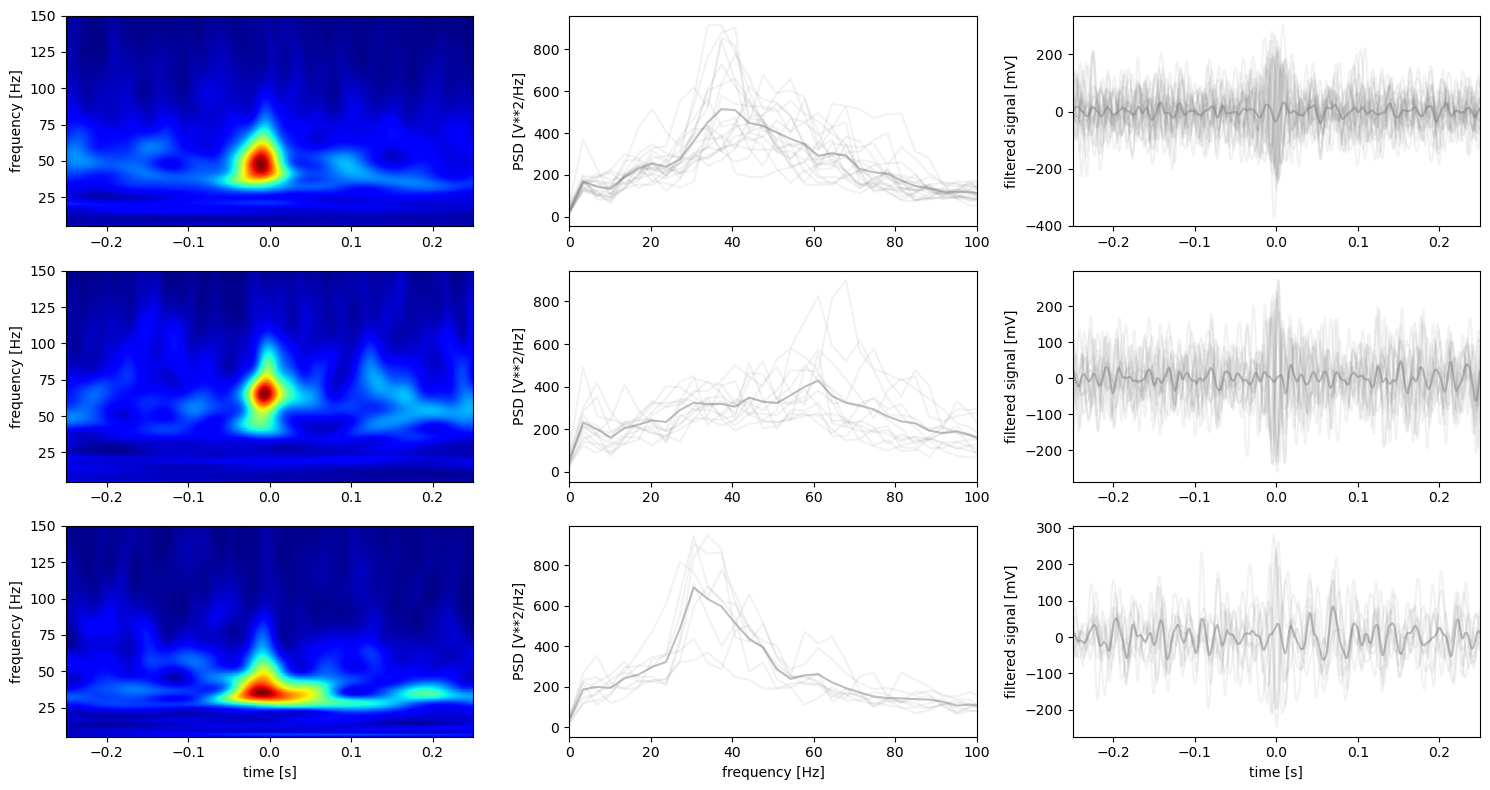

In [11]:
event_data.plot_cluster(channel)

In [13]:
cluster = 2

In [14]:
import pandas as pd
import numpy as np
from pyMate.Gordo import MriProcessing

In [15]:
#signal_filename = r'C:\Users\carst\Google Drive\05_Projects\NET_fMRI\data\K07.Ef1\K07.Ef1_13\K07Ef1_001.h5'
event_file = r'C:\Users\carst\Google Drive\05_Projects\NET_fMRI\data\K07.Ef1\K07.Ef1_13\events.csv'
subject_folder = r'C:\Users\carst\Google Drive\05_Projects\NET_fMRI\data\K07.Ef1\K07.Ef1_13'
session_files = [r'C:\Users\carst\Google Drive\05_Projects\NET_fMRI\pyMate\net\k07_ef1nostim_001.csv']

In [16]:
def add_empty_rows(df, insert_rows=2, start_row=0):

    new_df_length = insert_rows * len(df)
    df.index = range(start_row, new_df_length, insert_rows)
    
    return df.reindex(index = range(new_df_length)) 

In [17]:
event_seconds = 20
event_length = int(event_data.seconds_to_samples(event_seconds, event_data.data.raw_signal_sampling_rate))

In [18]:
ind = event_data.event_clusters[channel] == cluster

df = pd.DataFrame()
df['onset'] = event_data.peaks[channel][ind]

df = add_empty_rows(df, start_row=1)
df.iloc[::2] = df.loc[1::2] - event_length

df['duration'] = np.nan
df.loc[1::2, 'duration'] = event_seconds
df.loc[::2, 'duration'] = event_seconds

df['trial_type'] = ''
df.loc[1::2, 'trial_type'] = 'active'
df.loc[::2, 'trial_type'] = 'rest'

df['onset'] = df['onset'] / event_data.data.raw_signal_sampling_rate

df.to_csv(event_file, sep=',', index=False)

In [19]:
fmri = MriProcessing(session_files, subject_folder)
fmri.threshold = 2
fmri.mask_img = None
fmri.lets_go()

C:\Users\carst\anaconda3\envs\fmri\lib\site-packages\numpy\core\fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)
